In [90]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Fill Stop, Route, RouteStation

Lat, Long Name,

Stop Squence, Headsign

1001 - I
0001 - O

### Static Variables

In [91]:
schedule = pd.read_csv("bus_data/dublinbus_scheduledData2013csv.csv", low_memory=False, encoding="ISO-8859-1")


In [92]:
schedule = schedule.dropna()

### Exploring schedule

In [93]:
schedule.shape

(921993, 11)

In [94]:
schedule.tail(10)

,trip_id,arrival_time,departure_time,stop_id,Name without locality,Name,Lat,Long,stop_sequence,stop_headsign,shape_dist_traveled
922283,9999.2936.0-39-b12-1.241.O,10:44:19,10:44:19,8240DB007156,Ongar Road,Grange Road,53.388907,-6.430546,59,Ongar,23715.02753
922284,9999.2936.0-39-b12-1.241.O,10:45:29,10:45:29,8240DB007020,Latchford Park,Ongar Road,53.394163,-6.431134,60,Ongar,24388.74729
922285,9999.2936.0-39-b12-1.241.O,10:45:50,10:45:50,8240DB007029,Ravenwood Road,Ongar Road,53.395662,-6.429560,61,Ongar,24588.10732
922286,9999.2936.0-39-b12-1.241.O,10:46:28,10:46:28,8240DB007038,Castlegrange,Ongar Road,53.398270,-6.431058,62,Ongar,24955.37584
922287,9999.2936.0-39-b12-1.241.O,10:47:21,10:47:21,8240DB007011,Hazelbury Green,Ongar Road,53.401859,-6.435378,63,Ongar,25470.19107
922288,9999.2936.0-39-b12-1.241.O,10:48:38,10:48:38,8240DB002171,Lilys Way,Ongar,53.397920,-6.442124,64,Ongar,26208.85972
922289,9999.2936.0-39-b12-1.241.O,10:48:54,10:48:54,8240DB007160,Village,Ongar,53.396577,-6.442519,65,Ongar,26360.28203
922290,9999.2936.0-39-b12-1.241.O,10:49:48,10:49:48,8240DB007047,Ongar Green,Ongar,53.393118,-6.442600,66,Ongar,26873.28354
922291,9999.2936.0-39-b12-1.241.O,10:50:24,10:50:24,8240DB007161,Delhurst,Ongar,53.392054,-6.438158,67,Ongar,27214.72200
922292,9999.2936.0-39-b12-1.241.O,10:51:00,10:51:00,8240DB007162,Hansfield Road,Ongar,53.391281,-6.433390,68,Ongar,27546.81741


In [95]:
# Extracting StopID from stop_id

def get_stop(string):
    var = string[-4:]
    return var

schedule["StopID"] = schedule['stop_id'].apply(lambda x: get_stop(x))

In [96]:
# Extracting LineID from trip_id

schedule["LineID"] = schedule["trip_id"].str.extract('\-(.*?)\-')

C:\Users\eogha\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [97]:
# Convert StopIDs back to int
schedule['StopID'] = schedule['StopID'].astype('int64')

In [98]:
# Number of unique LineIDs 

lines = schedule["LineID"].unique()
lines.sort()
print(lines)

['1' '102' '104' '11' '111' '114' '116' '118' '120' '122' '123' '13' '130'
 '14' '140' '142' '145' '14C' '15' '150' '151' '15A' '15B' '16' '161' '16C'
 '17' '17A' '18' '184' '185' '220' '236' '238' '239' '25' '25A' '25B' '25X'
 '26' '27' '270' '27A' '27B' '27X' '29A' '31' '31A' '31B' '32' '32X' '33'
 '33A' '33B' '33X' '37' '38' '38A' '38B' '39' '39A' '4' '40' '40B' '40D'
 '41' '41A' '41B' '41C' '41X' '42' '43' '44' '44B' '45A' '46A' '46E' '47'
 '49' '51D' '51X' '53' '54A' '56A' '59' '61' '63' '65' '65B' '66' '66A'
 '66B' '66X' '67' '67X' '68' '68A' '69' '69X' '7' '70' '747' '75' '76'
 '76A' '77A' '79' '79A' '7B' '7D' '8' '83' '83A' '84' '84A' '84X' '9']


In [99]:
# Isolating line
# Examining how many stops are on each variation
# Saving this info in stops
line = lines[0]
schedule_line = schedule[schedule.LineID == line]

headsigns = schedule_line.stop_headsign.unique()

stops = {}

for sign in headsigns:
    stop_count = schedule_line[schedule_line.stop_headsign == sign].StopID.nunique()
    stop_list = schedule_line[schedule_line.stop_headsign == sign].StopID.unique()
    stops[sign] = [stop_count, stop_list]


In [100]:
schedule.head()

,trip_id,arrival_time,departure_time,stop_id,Name without locality,Name,Lat,Long,stop_sequence,stop_headsign,shape_dist_traveled,StopID,LineID
0,1.1598.0-33A-b12-1.451.I,16:15:00,16:15:00,8240DB003813,Footbridge,Skerries Road,53.591377,-6.156176,1,Swords,0.000000,3813,33A
1,1.1598.0-33A-b12-1.451.I,16:15:39,16:15:39,8240DB003814,Barnageeragh Road,Balbriggan Rd,53.585544,-6.148605,2,Swords,827.070328,3814,33A
2,1.1598.0-33A-b12-1.451.I,16:17:11,16:17:11,8240DB003815,Barnageeragh Road,North Cliff Heights,53.581935,-6.125247,3,Swords,2746.649492,3815,33A
3,1.1598.0-33A-b12-1.451.I,16:17:22,16:17:22,8240DB003816,Mourne Drive,North Cliff Heights,53.580471,-6.127622,4,Swords,2973.900755,3816,33A
4,1.1598.0-33A-b12-1.451.I,16:17:44,16:17:44,8240DB003566,Selskar Court,Town Parks Rd,53.578067,-6.125055,5,Swords,3447.155571,3566,33A


In [101]:
schedule["direction"] = [x[-1] for x in schedule.trip_id]

In [102]:
schedule_df = schedule.drop(['trip_id','arrival_time','departure_time','stop_id','shape_dist_traveled'],1)

In [103]:
def f(row):
    if row['direction'] == "I":
        val = 1001
    else:
        val = 1
    return val

In [104]:
#1001 - I 0001 - O
schedule_df["JourneyPatternID"] = schedule.apply(f, axis=1)

In [105]:
schedule_df.head()

,Name without locality,Name,Lat,Long,stop_sequence,stop_headsign,StopID,LineID,direction,JourneyPatternID
0,Footbridge,Skerries Road,53.591377,-6.156176,1,Swords,3813,33A,I,1001
1,Barnageeragh Road,Balbriggan Rd,53.585544,-6.148605,2,Swords,3814,33A,I,1001
2,Barnageeragh Road,North Cliff Heights,53.581935,-6.125247,3,Swords,3815,33A,I,1001
3,Mourne Drive,North Cliff Heights,53.580471,-6.127622,4,Swords,3816,33A,I,1001
4,Selskar Court,Town Parks Rd,53.578067,-6.125055,5,Swords,3566,33A,I,1001


## Merge Alternatives
set intersection

## Merge to Extract common Stops

In [106]:
filepath = "bus_data/line_data/15.csv"
temp_df = pd.read_csv(filepath, header=None)

temp_df.columns = ["Timestamp", "LineID", "JourneyPatternID", "TimeFrame", 
              "VehicleJourneyID", "Lon", "Lat", "VehicleID", "StopID", 
              "AtStop", "HumanTime", "Day", "Hour", "Runtime"]

temp_df.head()

,Timestamp,LineID,JourneyPatternID,TimeFrame,VehicleJourneyID,Lon,Lat,VehicleID,StopID,AtStop,HumanTime,Day,Hour,Runtime
0,1352181644000000,15,1,2012-11-06,5891,-6.153783,53.402687,33553,6319,1,2012-11-06 06:00:44,1,6,0
1,1352181825000000,15,1,2012-11-06,5891,-6.163521,53.399288,33553,4594,1,2012-11-06 06:03:45,1,6,181
2,1352181904000000,15,1,2012-11-06,5891,-6.173066,53.402138,33553,4595,1,2012-11-06 06:05:04,1,6,260
3,1352181908000000,15,1001,2012-11-06,5781,-6.310957,53.286865,33469,1153,1,2012-11-06 06:05:08,1,6,0
4,1352181944000000,15,1,2012-11-06,5891,-6.177130,53.402370,33553,4596,1,2012-11-06 06:05:44,1,6,300


In [181]:
merged_df = schedule_df.copy()

In [182]:
merged_df.head()

,Name without locality,Name,Lat,Long,stop_sequence,stop_headsign,StopID,LineID,direction,JourneyPatternID
0,Footbridge,Skerries Road,53.591377,-6.156176,1,Swords,3813,33A,I,1001
1,Barnageeragh Road,Balbriggan Rd,53.585544,-6.148605,2,Swords,3814,33A,I,1001
2,Barnageeragh Road,North Cliff Heights,53.581935,-6.125247,3,Swords,3815,33A,I,1001
3,Mourne Drive,North Cliff Heights,53.580471,-6.127622,4,Swords,3816,33A,I,1001
4,Selskar Court,Town Parks Rd,53.578067,-6.125055,5,Swords,3566,33A,I,1001


In [183]:
temp_df.head()

,Timestamp,LineID,JourneyPatternID,TimeFrame,VehicleJourneyID,Lon,Lat,VehicleID,StopID,AtStop,HumanTime,Day,Hour,Runtime
0,1352181644000000,1,1,2012-11-06,5891,-6.153783,53.402687,33553,6319,1,2012-11-06 06:00:44,1,6,0
1,1352181825000000,1,1,2012-11-06,5891,-6.163521,53.399288,33553,4594,1,2012-11-06 06:03:45,1,6,181
2,1352181904000000,1,1,2012-11-06,5891,-6.173066,53.402138,33553,4595,1,2012-11-06 06:05:04,1,6,260
3,1352181908000000,1001,1001,2012-11-06,5781,-6.310957,53.286865,33469,1153,1,2012-11-06 06:05:08,1,6,0
4,1352181944000000,1,1,2012-11-06,5891,-6.177130,53.402370,33553,4596,1,2012-11-06 06:05:44,1,6,300


In [184]:
temp_df.dtypes

Timestamp             int64
LineID               object
JourneyPatternID     object
TimeFrame            object
VehicleJourneyID      int64
Lon                 float64
Lat                 float64
VehicleID             int64
StopID                int64
AtStop                int64
HumanTime            object
Day                   int64
Hour                  int64
Runtime               int64
dtype: object

In [185]:
merged_df.dtypes

Name without locality     object
Name                      object
Lat                      float64
Long                     float64
stop_sequence              int64
stop_headsign             object
StopID                     int64
LineID                    object
direction                 object
JourneyPatternID           int64
dtype: object

In [186]:
temp_df.LineID = temp_df.LineID.astype('object', copy=False)
merged_df.LineID = merged_df.LineID.astype('object', copy=False)

In [187]:
temp_df.JourneyPatternID = temp_df.JourneyPatternID.astype('object', copy=False)
merged_df.JourneyPatternID = merged_df.JourneyPatternID.astype('object', copy=False)

In [190]:
merged_df = merged_df.merge(temp_df, how='inner', on=['StopID','JourneyPatternID','LineID'])

TypeError: object of type 'NoneType' has no len()

In [189]:
new_df.head()

NameError: name 'new_df' is not defined

## Extract Routes

In [191]:
routes = schedule_df.drop_duplicates(subset=['LineID','JourneyPatternID'], keep='first', inplace=False)
routes = routes.drop(['Name without Locality','Name','Lat','Long','stop_sequence','StopID',''],1)

ValueError: labels ['Name without Locality' ''] not contained in axis

In [192]:
routes.head()

,Name without locality,Name,Lat,Long,stop_sequence,stop_headsign,StopID,LineID,direction,JourneyPatternID
0,Footbridge,Skerries Road,53.591377,-6.156176,1,Swords,3813,33A,I,1001
55,River Valley Lawn,River Valley Rd,53.452718,-6.237086,1,Abbey St,3088,41C,I,1001
155,Simons Ridge,Blackglen,53.269295,-6.240579,1,Blackrock DART,6200,114,O,1
183,Hansfield Road,Ongar Road,53.391120,-6.433486,1,Baggot St,7157,39,I,1001
260,Mespil Road,Burlington Road,53.333000,-6.247042,1,Ongar,7333,39,O,1


## Extract Stops

In [19]:
stops = schedule_df.drop_duplicates(subset=['StopID'], keep='first', inplace=False)

In [26]:
stops.head(5)

,Name without locality,Name,Lat,Long,StopID
0,Footbridge,Skerries Road,53.591377,-6.156176,3813
1,Barnageeragh Road,Balbriggan Rd,53.585544,-6.148605,3814
2,Barnageeragh Road,North Cliff Heights,53.581935,-6.125247,3815
3,Mourne Drive,North Cliff Heights,53.580471,-6.127622,3816
4,Selskar Court,Town Parks Rd,53.578067,-6.125055,3566


In [24]:
stops = stops.drop(['stop_sequence','stop_headsign','LineID','direction','JourneyPatternID'],1)

In [28]:
cols = ['StopID','Name without locality', 'Name', 'Lat', 'Long']
stops = stops[cols]

In [29]:
stops.to_csv("stops.csv")

# Loops

In [ ]:
# Map first digit of JourneyPatternID to a direction
for line in lines:
    print()
    print(line)
    print()
    journey_pattern_dict = {}

    ## Import Data For given Line
    linedata = pd.read_csv("bus_data/line_data/"+line+".csv")
    linedata.columns = ["Timestamp", "LineID", "JourneyPatternID", "TimeFrame", 
              "VehicleJourneyID", "Lon", "Lat", "VehicleID", "StopID", 
              "AtStop", "HumanTime", "Day", "Hour", "Runtime"]

    for date in timeframes:
        print("date:",date)
        day = pd.to_datetime(date)
        service_type = service_types[day.dayofweek]
        time_frame_groups = linedata.groupby('TimeFrame')

        for time_frame_label, time_frame_df in time_frame_groups:
    #         print("time_frame_label:",time_frame_label)
            journey_pattern_groups = time_frame_df.groupby('JourneyPatternID')

            for journey_pattern_label, journey_pattern_df in journey_pattern_groups:
                vehicle_journey_groups = journey_pattern_df.groupby('VehicleJourneyID')

                for vehicle_journey_label, vehicle_journey_df in vehicle_journey_groups:
                    #get first occurence of vehicleJourneyID
                    start = vehicle_journey_df.Lat.iloc[0]
                    #get last occurence of vehicleJourneyID
                    end = vehicle_journey_df.Lat.iloc[-1]

                    direction = (start - end)
                    #sum should reveal the most common directions
                    if direction > 0:
                        #[SOUTHBOUND COUNT, NORTHBOUND COUNT]
                        if not journey_pattern_label in journey_pattern_dict:
                            journey_pattern_dict[journey_pattern_label] = [0,1]
                        else:
                            journey_pattern_dict[journey_pattern_label][1] += 1
                    else:
                        if not journey_pattern_label in journey_pattern_dict:
                            journey_pattern_dict[journey_pattern_label] = [1,0]
                        else:
                            journey_pattern_dict[journey_pattern_label][0] += 1

    #         for key, value in journey_pattern_dict.items():
    #             print(key,"is southbound", str(value[0]>value[1]))


        #Create Dataframe with direction counts and JourneyPatternIDs for a single line
        df = pd.DataFrame.from_dict(journey_pattern_dict).T
        df['JourneyPatternID'] = df.index
        df.reset_index(drop=True)


        # df.index.name = 'JourneyPatternID'
        df.columns = ['northbound','southbound','JourneyPatternID']
        df['line'] = line
    #     df['JourneyPatternID'] = journeypattern

    line_journey_pattern_mapping = line_journey_pattern_mapping.append(df, ignore_index=True)
    #add into master df
    journey_pattern_mapping = journey_pattern_mapping.append(line_journey_pattern_mapping, ignore_index=True)
    journey_pattern_mapping

In [49]:
# Map first digit of JourneyPatternID to a direction
for line in lines:
    print(line)
    print()
    journey_pattern_dict = {}

    ## Import Data For given Line
    linedata = pd.read_csv("bus_data/line_data/"+line+".csv")
    linedata.columns = ["Timestamp", "LineID", "JourneyPatternID", "TimeFrame", 
              "VehicleJourneyID", "Lon", "Lat", "VehicleID", "StopID", 
              "AtStop", "HumanTime", "Day", "Hour", "Runtime"]

    for date in timeframes:
        print("date:",date)
        day = pd.to_datetime(date)
        service_type = service_types[day.dayofweek]
        time_frame_groups = linedata.groupby('TimeFrame')

        for time_frame_label, time_frame_df in time_frame_groups:
    #         print("time_frame_label:",time_frame_label)
            journey_pattern_groups = time_frame_df.groupby('JourneyPatternID')

            for journey_pattern_label, journey_pattern_df in journey_pattern_groups:
                vehicle_journey_groups = journey_pattern_df.groupby('VehicleJourneyID')

                for vehicle_journey_label, vehicle_journey_df in vehicle_journey_groups:
                    #get first occurence of vehicleJourneyID
                    start = vehicle_journey_df.Lat.iloc[0]
                    #get last occurence of vehicleJourneyID
                    end = vehicle_journey_df.Lat.iloc[-1]

                    direction = (start - end)
                    #sum should reveal the most common directions
                    if direction > 0:
                        #[SOUTHBOUND COUNT, NORTHBOUND COUNT]
                        if not journey_pattern_label in journey_pattern_dict:
                            journey_pattern_dict[journey_pattern_label] = [0,1]
                        else:
                            journey_pattern_dict[journey_pattern_label][1] += 1
                    else:
                        if not journey_pattern_label in journey_pattern_dict:
                            journey_pattern_dict[journey_pattern_label] = [1,0]
                        else:
                            journey_pattern_dict[journey_pattern_label][0] += 1

    #         for key, value in journey_pattern_dict.items():
    #             print(key,"is southbound", str(value[0]>value[1]))


        #Create Dataframe with direction counts and JourneyPatternIDs for a single line
        df = pd.DataFrame.from_dict(journey_pattern_dict).T
        df['JourneyPatternID'] = df.index
        df.reset_index(drop=True)


        # df.index.name = 'JourneyPatternID'
        df.columns = ['northbound','southbound','JourneyPatternID']
        df['line'] = line
    #     df['JourneyPatternID'] = journeypattern

    line_journey_pattern_mapping = line_journey_pattern_mapping.append(df, ignore_index=True)
    #add into master df
    journey_pattern_mapping = journey_pattern_mapping.append(line_journey_pattern_mapping, ignore_index=True)
    journey_pattern_mapping

40     35793
46A    35059
27     29261
145    28990
13     28440
39A    27847
16     27800
15     27167
7      23651
9      21753
14     19542
77A    18821
123    17345
83     16204
122    15652
17A    15530
39     15442
37     15046
130    14925
75     14679
41C    14116
41     13612
11     13241
4      13107
151    13037
15B    12800
18     12498
42     12402
27B    12286
140    11925
       ...  
67X      812
8        780
66X      724
84A      643
33X      613
38B      600
84X      572
7B       546
31B      539
16C      508
44B      359
142      336
41X      324
14C      277
111      270
161      256
68A      248
76A      246
51D      238
7D       219
25X      218
27X      184
32X      182
236      155
116      113
41A      106
46E       76
51X       49
118       42
69X       37
Name: LineID, dtype: int64

In [23]:
# print(line)
# print(stop_count)
# print(stop_list)

# print(stops)
df = pd.DataFrame(stops)
df.head()

,O'Connell Street,Sandymount,Shanard Road
0,50,42,46
1,"[226, 228, 229, 227, 230, 231, 1641, 1642, 213...","[226, 228, 229, 227, 230, 231, 1641, 1642, 213...","[381, 382, 4451, 383, 384, 385, 636, 637, 638,..."


In [24]:
# Getting max value for headsign
max_headsign = schedule_line['stop_headsign'].value_counts().idxmax()
schedule_line = schedule_line[schedule_line.stop_headsign == max_headsign]

In [26]:
schedule_line

,trip_id,arrival_time,departure_time,stop_id,Name without locality,Name,Lat,Long,stop_sequence,stop_headsign,shape_dist_traveled,StopID,LineID
82456,11231.54.0-1-b12-1.4.I,09:00:00,09:00:00,8220DB000381,Strand Road,Park Avenue,53.324197,-6.212289,1,Shanard Road,0.000000,381,1
82457,11231.54.0-1-b12-1.4.I,09:01:03,09:01:03,8220DB000382,Seamount House,St. John's Road,53.325097,-6.207628,2,Shanard Road,351.534642,382,1
82458,11231.54.0-1-b12-1.4.I,09:01:27,09:01:27,8220DB004451,St. John's Road East,Strand Road,53.325943,-6.207698,3,Shanard Road,483.661567,4451,1
82459,11231.54.0-1-b12-1.4.I,09:02:23,09:02:23,8220DB000383,Gilford Road,Strand Road,53.328605,-6.208937,4,Shanard Road,790.722799,383,1
82460,11231.54.0-1-b12-1.4.I,09:03:26,09:03:26,8220DB000384,Lea Road,Strand Road,53.331607,-6.210178,5,Shanard Road,1142.665594,384,1
82461,11231.54.0-1-b12-1.4.I,09:03:55,09:03:55,8220DB000385,Strand Road,Newgrove Ave,53.332351,-6.211228,6,Shanard Road,1304.066285,385,1
82462,11231.54.0-1-b12-1.4.I,09:04:00,09:04:00,8250VIR0636,Virtual Stop 1,Newgrove Ave,53.332194,-6.211520,7,Shanard Road,1330.238790,636,1
82463,11231.54.0-1-b12-1.4.I,09:04:05,09:04:05,8250VIR0637,Virtual Stop 2,Newgrove Ave,53.332028,-6.211842,8,Shanard Road,1358.523061,637,1
82464,11231.54.0-1-b12-1.4.I,09:04:10,09:04:10,8250VIR0638,Virtual Stop 3,Newgrove Ave,53.331835,-6.212165,9,Shanard Road,1389.635759,638,1
82465,11231.54.0-1-b12-1.4.I,09:04:28,09:04:28,8250VIR0639,Virtual Stop 4,Newgrove Avenue,53.331694,-6.213567,10,Shanard Road,1491.691253,639,1


### Exploring line 15

In [13]:
# # Isolating variations - getting variation with most stops

# df_0001 = df[df.JourneyPatternID == 1]
# df_1001 = df[df.JourneyPatternID == 1001]
# df_0002 = df[df.JourneyPatternID == 2]
# df_1002 = df[df.JourneyPatternID == 1002]

max_pattern = df['JourneyPatternID'].value_counts().idxmax()
df = df[df.JourneyPatternID == max_pattern]

In [14]:
runtimes = df.groupby("StopID").Runtime.mean()

In [15]:
# print(runtimes.sort_values())

In [16]:
# print("1218" in stops["Ballycullen Road"][1])

In [17]:
# stoplist = [x for x in df_0002.StopID.unique() if x not in stops["Ballycullen Road"][1]]

In [18]:
# print(stoplist)

### Comparing Schedule to our data


In [19]:
# Number of unique stops on each variation in our data
# variations = df.JourneyPatternID.unique()
# print(variations)
print(df.StopID.nunique())
# print(df_1001.StopID.nunique())
# print(df_0002.StopID.nunique())
# print(df_1002.StopID.nunique())

88


In [20]:
# Number of stops on each variation in schedule - doesn't line up exactly 

for key, value in stops.items():
    print(key, ":", value[0])

Ballycullen Road : 72
Clongriffin : 68
Eden Quay : 37
Hawkins St : 34


In [38]:
set1 = set(df.StopID.unique())
set2 = set(schedule.StopID.unique())

print(len(set1.difference(set2)))


0


In [23]:
# Finding stops that are on schedule variation but not our data

set1 = set(df.StopID.unique())
set2 = set(schedule_line.StopID.unique())

misc_stops = set2.difference(set1)

print(list(misc_stops))

[]


In [24]:
# # Looking at number of shared stops in our data & schedule

# for pattern in journey_patterns:
#     set1 = set(pattern.StopID.unique())
#     print("Number of stops in", pattern.name, "=", len(set1))
#     for key, value in stops.items():
#         set2 = set(value[1])
# #         print(pattern.name, "&", key, ":", set2.issubset(set1))
#         print(pattern.name, "&", key, ":", len(set2.intersection(set1)))
#     print()

# # print(set1.isdisjoint(set2))
# # print(set1.difference(set2))

### Plotting Stops

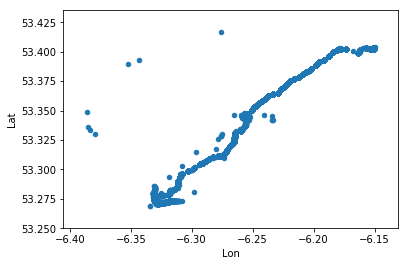

In [25]:
# Plotting stops in our data

locations = df[["Lon", "Lat"]]
locations.plot.scatter(x="Lon", y="Lat")

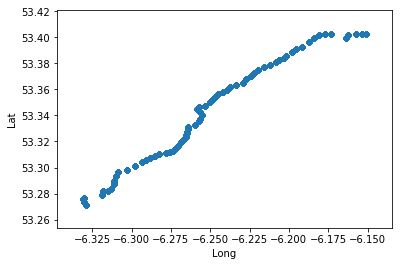

In [26]:
# Plotting stops in schedule

schedule_locations = schedule_line[["Long", "Lat"]]
schedule_locations.plot.scatter(x="Long", y="Lat")

In [28]:
# Plotting stops in schedule but not data (misc_stops)

set1 = set(df.StopID.unique())
set2 = set(schedule_line.StopID.unique())
misc_stops = set2.difference(set1)

misc_df = schedule_line[schedule_line.StopID.isin(misc_stops)]

misc_df.head()

if len(misc_df > 0):
    locations = misc_df[["Long", "Lat"]]
    locations.plot.scatter(x="Long", y="Lat")
else:
    print("No difference!")

No difference!


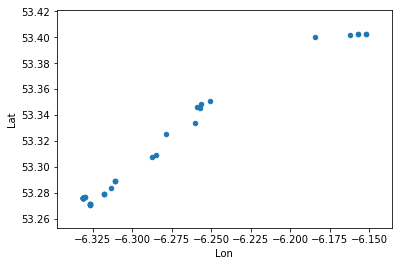

In [29]:
# Plotting stops in data but not schedule (misc_stops2)

set1 = set(df.StopID.unique())
set2 = set(schedule_line.StopID.unique())
misc_stops = set1.difference(set2)

misc_df = df[df.StopID.isin(misc_stops)]

misc_df.head()

if len(misc_df > 0):
    locations = misc_df[["Lon", "Lat"]]
    locations.plot.scatter(x="Lon", y="Lat")
else:
    print("No difference!")

### Removing irrelevant stops in our data

In [30]:
# df_0001["StopID"].value_counts()

In [31]:
# Removing stops that don't occur at least 100 times in our data

groups = df.groupby('StopID')
clean_0001 = groups.filter(lambda x: len(x) > 100)

In [32]:
clean_0001["StopID"].value_counts()

6282    6134
5190    3905
4415    3741
403     3715
4563    3527
1076    3007
348     2984
1277    2799
668     2705
1270    2661
1016    2635
1274    2635
746     2543
1014    2494
1273    2429
664     2410
1077    2387
1020    2384
844     2295
4594    2238
1220    2199
616     2184
1127    2176
615     2133
1085    2125
1081    2066
1145    2026
4595    1946
1125    1942
1130    1860
        ... 
3007    1477
6320    1477
1275    1473
4869    1472
665     1405
1143    1404
1017    1369
1221    1355
1219    1345
1144    1324
1141    1292
1082    1278
617     1266
6319    1199
1142    1199
7246    1183
4870    1096
619     1063
1080    1009
1019     985
1083     957
1018     917
1272     745
1124     664
666      588
1123     508
1078     504
1276     499
1122     414
6318     352
Name: StopID, dtype: int64

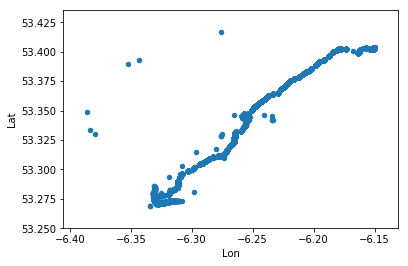

In [33]:
# Plotting stops in our data

locations = clean_0001[["Lon", "Lat"]]
locations.plot.scatter(x="Lon", y="Lat")

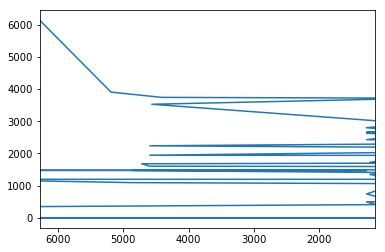

In [34]:
df["StopID"].value_counts().plot()

### Plotting common routes between data and schedule

In [35]:
set1 = set(df.StopID.unique())
set2 = set(schedule_line.StopID.unique())

common_stops = set2.intersection(set1)

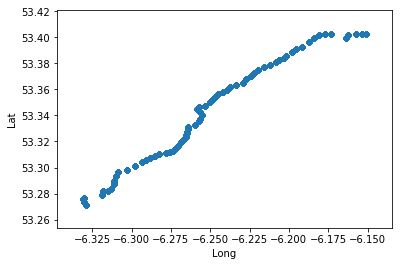

In [36]:
# Plotting stops in schedule and data (common_stops)

common_df = schedule_line[schedule_line.StopID.isin(common_stops)]

common_df.head()

locations = common_df[["Long", "Lat"]]
locations.plot.scatter(x="Long", y="Lat")